# Multilayer Neural Network

Add dependencies

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib  inline

## Set the network shape

List containing the number of neurones in each layer.

In [11]:
shape = [2, 4, 2, 1]

print("This network contains " + str(shape[0]) + " input(s) and " + str(shape[-1]) + " output(s).")
print("It has " + str(len(shape) - 2) + " hidden layer(s) with respectively " + str(shape[1:-1]) + " neuron(s).")

This network contains 2 input(s) and 1 output(s).
It has 2 hidden layer(s) with respectively [4, 2] neuron(s).


Define the activation functions and their derivatives

In [12]:
def activ(x,type='tanh', deriv=False):
    
    if type == 'sigmoid':
        if deriv:
            res = activ(x, type='sigmoid')
            return res * (1 - res)
        else:
            return 1/(1+np.exp(-x))
        
    elif type == 'tanh':
        if deriv:
            return 1-activ(x, type='tanh')**2
        else:
            return 2/(1 + np.exp(-2*x)) - 1
        
    elif type == 'linear':
        if deriv:
            return 1
        else:
            return x
        
    elif type == 'ReLU':
        if deriv:
            return 1*(x >= 0)
        else:
            return x*(x >= 0)

## Create synapses

In [13]:
syn = []
for layer in range(len(shape) - 1):
    syn += [np.random.random((shape[layer],shape[layer + 1])) - 1]

## Choosing input and desired output

Input : sets of 2 binary variables

In [14]:
x = np.array([
[0, 0],
[0, 1],
[1, 0],
[1, 1]
])

Output : XOR function

In [15]:
y = np.array([
[0],
[1],
[1],
[0]
])

## Training

Set training parameters :

In [16]:
# number of iterations
N = 1000
# learning rate
learning_rate = 0.03
# number of steps to print during the computation
PB = 10

Initialize layers

In [17]:
layers = []
for layer_size in shape:
    layers += (np.zeros((len(x),layer_size)),)
layers[0] = x

Loop

In [18]:
# initialize error memory
error = []
PB_step = N/(PB+1)

for i in range(N):
    
    # forward iteration
    for layer in range(1,len(shape)):
        layers[layer] = activ(np.dot(layers[layer - 1], syn[layer-1]))
    
    # back-propagation
    for layer in range(len(syn),0,-1):
        if layer == len(syn):
            layer_error = y - layers[-1]
            if i % np.ceil(N/100) == 0:
                error.append(np.mean(np.abs(layer_error)))
            ####################################
            # print error
            r = i/PB_step
            if abs(r - round(r)) < 1/(2*PB_step):
                print(str(round(100 * r / PB)) + '%' + ' : error = ' + str(100 * error[-1]) + '%')
            ####################################
        else:
            layer_error = loss_function.dot(syn[layer].T)
            syn[layer] += learning_rate * layers[layer].T.dot(loss_function)  
        loss_function = layer_error * activ(layers[layer], deriv=True)
    syn[0] += layers[0].T.dot(loss_function)
        

0% : error = 78.9362172372%
10% : error = 36.0636533719%
20% : error = 36.170493379%
30% : error = 12.6602014165%
40% : error = 4.19067553433%
50% : error = 2.51239144695%
60% : error = 1.78960437435%
70% : error = 1.38616338551%
80% : error = 1.12894893627%
90% : error = 0.950897290783%
100% : error = 0.820496646341%


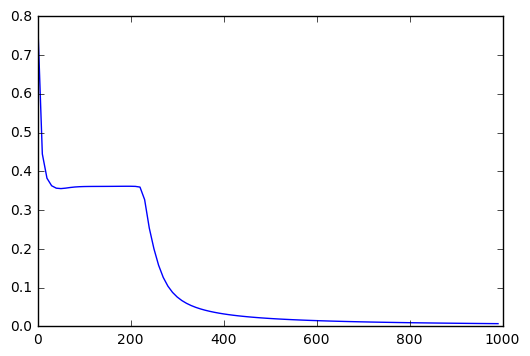

In [19]:
plt.plot([np.ceil(N/100) * i for i in range(len(error))], error)

In [20]:
np.set_printoptions(suppress=True,precision=3)
print('  Final | Desired :')
print(np.concatenate((layers[-1],y),axis=1))

  Final | Desired :
[[ 0.     0.   ]
 [ 0.988  1.   ]
 [ 0.987  1.   ]
 [ 0.003  0.   ]]


# Plotting for this example

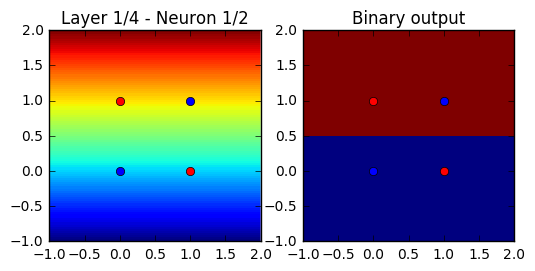

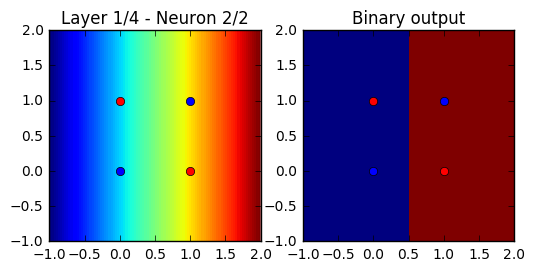

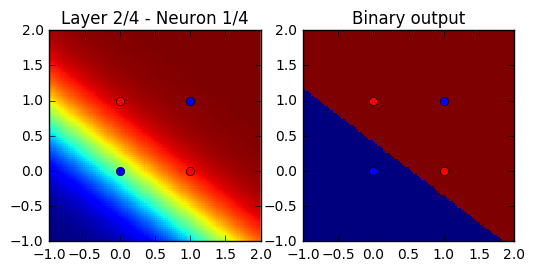

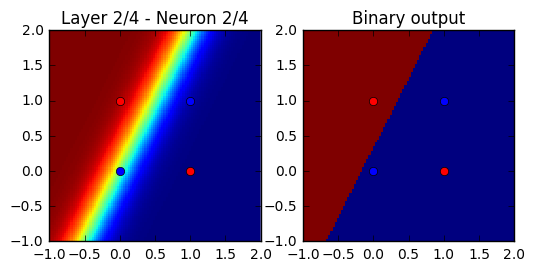

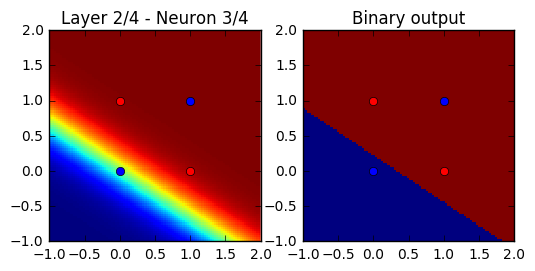

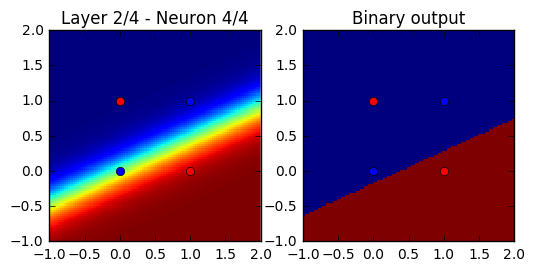

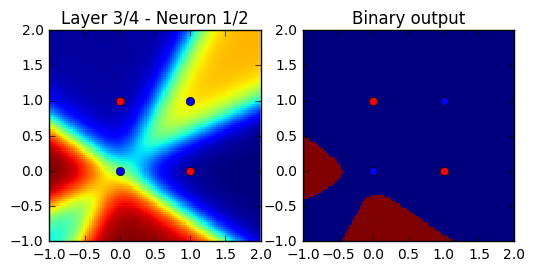

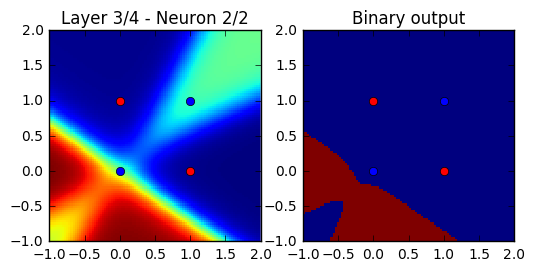

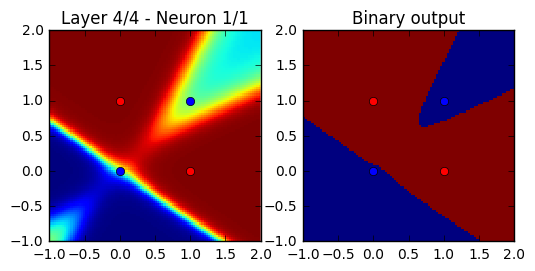

In [21]:
def apply_NN(x, y, level = len(syn)):
    synapses = np.array([[x, y]])
    for i in range(level):
        synapses = activ(synapses.dot(syn[i]))
    return synapses

def plot_layer(compute_neuron_output_func, map_x, map_y, title):
    level_map = np.zeros((map_x, map_y, np.shape(compute_neuron_output_func(0,0))[1]))
    x_pos = np.linspace(-1,2,map_x)
    y_pos = np.linspace(-1,2,map_y)
    for i in range(map_x):
        for j in range(map_y):
            level_map[i,j] = compute_neuron_output_func(x_pos[i],y_pos[j])

    for i in range(np.shape(level_map)[2]):
        plt.figure()
        
        plt.subplot(1,2,1)
        plt.plot(x[np.where(y == 1)[0]][:,0],x[np.where(y == 1)[0]][:,1],'or')
        plt.plot(x[np.where(y == 0)[0]][:,0],x[np.where(y == 0)[0]][:,1],'ob')
        axis = plt.gca()
        axis.set_xlim((-1,2))
        axis.set_ylim((-1,2))
        plt.imshow(level_map[:,:,i], origin='lower', interpolation='none', extent=(-1,2,-1,2))
        plt.title(title + ' - Neuron ' + str(i + 1) + '/' + str(np.shape(level_map)[2]))
        
        plt.subplot(1,2,2)
        plt.plot(x[np.where(y == 1)[0]][:,0],x[np.where(y == 1)[0]][:,1],'or')
        plt.plot(x[np.where(y == 0)[0]][:,0],x[np.where(y == 0)[0]][:,1],'ob')
        axis = plt.gca()
        axis.set_xlim((-1,2))
        axis.set_ylim((-1,2))
        plt.imshow(level_map[:,:,i] > 0.5, origin='lower', interpolation='none', extent=(-1,2,-1,2))
        plt.title('Binary output')

for layer in range(len(layers)):
    plot_layer(lambda x, y: apply_NN(x, y, layer), 100, 100, 'Layer ' + str(layer + 1) + '/' + str(len(layers)))